<a href="https://colab.research.google.com/github/Sadhana1842/AQI-Prediction/blob/main/LR_70_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESCRIPTION OF PROJECT:**

* Include all Features
* Remove only Null values
* Do not remove outliers
* Perform 70/30 fitting using Linear regressor
* Calculate mean squared error
* Plot Graph


In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded=files.upload()
df=pd.read_csv(io.BytesIO(uploaded["AQI_DATASET.csv"]))
print(df)

Saving AQI_DATASET.csv to AQI_DATASET.csv
       City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
0     Delhi  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
1     Delhi  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
2     Delhi  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
3     Delhi  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
4     Delhi  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...     ...         ...     ...     ...    ...    ...     ...     ...    ...   
2004  Delhi  27-06-2020   39.80  155.94  10.88  21.46   22.47   31.43   0.87   
2005  Delhi  28-06-2020   59.52  308.65  12.67  21.60   23.86   29.27   0.94   
2006  Delhi  29-06-2020   44.86  184.12  10.50  21.57   21.94   27.97   0.88   
2007  Delhi  30-06-2020   39.80   91.98   5.99  17.96   15.44   28.48   0.84   
2008  Delhi  01-07-2020   54.01  128.66   6.33  21.05   16.81   29.06   0.97  

In [ ]:
df.head
df.shape
df.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [ ]:
df = df.dropna()

<Axes: >

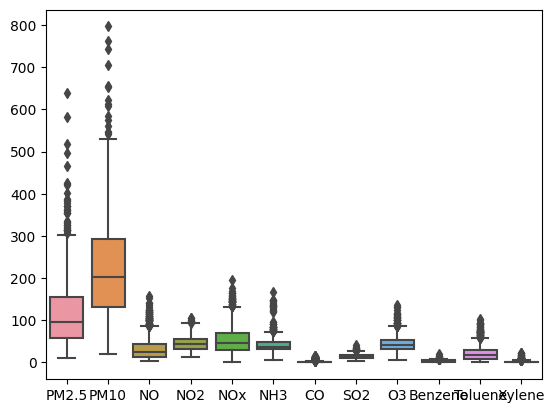

In [ ]:
import seaborn as sns
X= df.drop(['City', 'AQI_Bucket', 'AQI','Date'], axis= 1)
y= df['AQI']
sns.boxplot(data=X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_X_train = Scaler.fit_transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train, y_train)

LinearRegression()

In [ ]:
pred = lin_reg.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(pred, y_test)

1293.491740141561

In [ ]:
import numpy as np
np.sqrt(mean_squared_error(y_test,pred))

35.96514618546074

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

ValueError: ignored

In [ ]:
import numpy as np
x=np.arange(0,len(y_test))
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

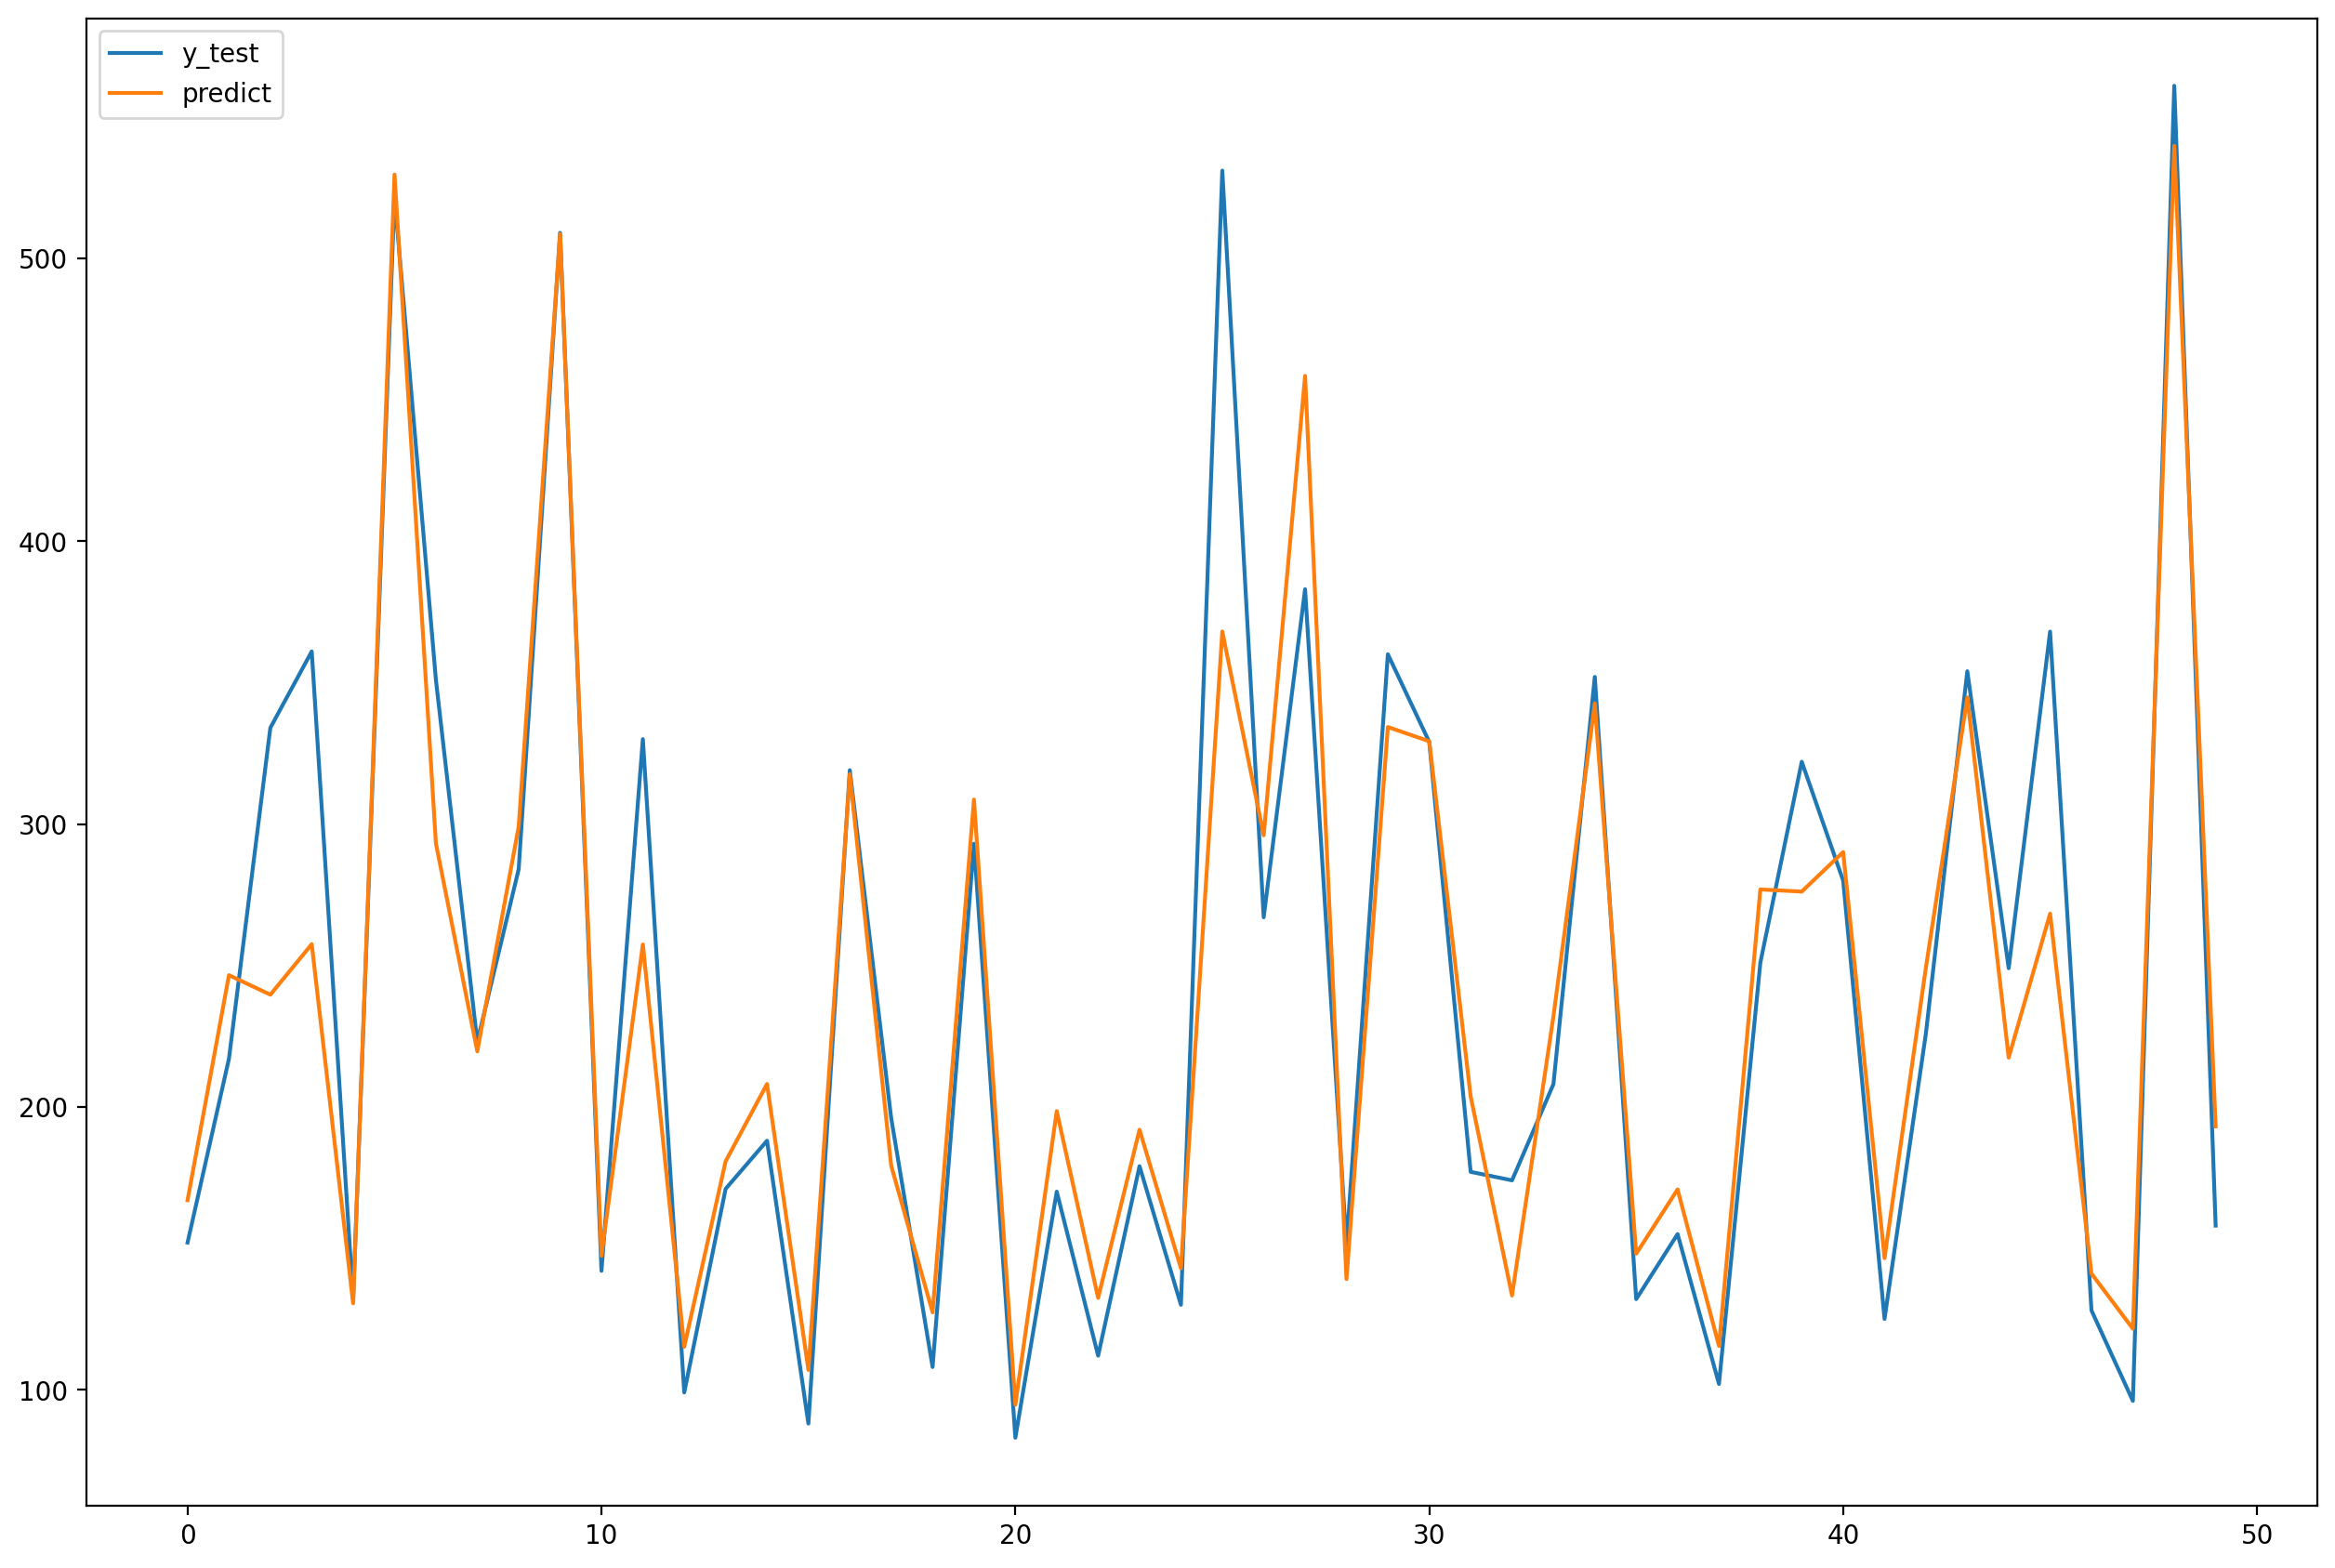

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(12,8), dpi=200)

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x[0:50], y_test[0:50], label='y_test')
axes.plot(x[0:50], pred[0:50], label='predict')
plt.legend()
plt.show()